<a href="https://colab.research.google.com/github/CindyMG/Core-II-Wk-1/blob/main/(Final)_Core_II_Wk_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Defining the question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).


**Approach 1: Polynomial approach**

What to train given:

*Rank of home team*

*Rank of away team*

*Tournament type* 

**Model 1**: Predict how many goals the home team scores.

**Model 2**: Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#Importing our python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# now, let us load our datasets onto our notebook
#
fifa_rank = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

In [3]:
#let us preview our datasets
fifa_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
#let us preview our datasets
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
#checking how many records we have
results.shape

(40839, 9)

#Cleaning the datasets

##Adding 'Status' column

We will add a new column to our dataset, 'Status'. This will show whether the teams had a win(W), loss(L) or a draw(D)

In [6]:
#by getting the difference between the home scores and the away scores, we can tell whether the match was a win, a loss or a draw
results['Status'] = results['home_score'] - results['away_score'] 
results['Status']

0        0
1        2
2        1
3        0
4        3
        ..
40834    7
40835    0
40836   -1
40837   -1
40838    0
Name: Status, Length: 40839, dtype: int64

In [7]:
#using a function to represent the above thesis
# if the difference is >= 1, the home team scored more than the away team, hence warranting a win
# if the difference is 0, the home team scored the same as the away team, hence warranting a draw
# if the difference is <= -1, the home team scored less than the away team, hence warranting a loss

def stats(fifa):
    column1 = []
    for i in fifa['Status']:
        if i == 0:
            column1.append('D')
        elif i >= 1:
            column1.append('W')
        elif i <= -1:
            column1.append('L')
    return column1 
        

In [8]:
#introducing the new column 'Status' by calling the function above
X = stats(results)
Status = pd.DataFrame(X)

In [9]:
#viewing the new column
Status

,0
0,D
1,W
2,W
3,D
4,W
...,...
40834,W
40835,D
40836,L
40837,L


In [10]:
# now, we merge the dataset 'results' with the new column 'Status'
fifa1 = pd.merge(results, Status, left_index= True, right_index= True )
fifa1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status,0
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,D
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,W
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,W
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,D
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,W
...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7,W
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,0,D
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,-1,L
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,-1,L


##The final dataset.

In [11]:
# now, we merge the dataset above with the 'fifa_rank' dataset to obtain our final dataset
# we will use the common columns 'country_full' and 'home_team' for merging
fifa= pd.merge(fifa_rank, fifa1, left_on = 'country_full', right_on= 'home_team')
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status,0
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1,W
1,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,-3,L
2,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,-1,L
3,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,4,W
4,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,Germany,False,-1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10275055,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,Gibraltar,False,-2,L
10275056,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,Gibraltar,False,1,W
10275057,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-11-16,Gibraltar,Armenia,2,6,UEFA Nations League,Gibraltar,Gibraltar,False,-4,L
10275058,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,Gibraltar,False,-1,L


In [12]:
#let us check how many records we have 
fifa.shape

(10275060, 27)

Now we will drop the records that date before the year 1993 and later than 2018, for easier analysis of the ranking of the teams.

In [13]:
#using the loc() function
fifa= fifa.loc[(fifa['date']>='1993-08-07')&(fifa['date']<'2018-06-08')]

#now, let us check how many records we have left
fifa.shape

(5474440, 27)

##Sampling

In [14]:
# our dataset is quite large so for easier analysis, we will use 10% of the dataset
#Stratified sample using the strata 'rank'
fifa_sample = fifa.groupby('rank', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(fifa_sample['rank'].value_counts())

# Check the stratified output
fifa_sample.shape

1      5248
2      5079
5      4826
4      4771
3      4755
       ... 
205     428
206     320
207     255
208      50
209      17
Name: rank, Length: 209, dtype: int64


(547440, 27)

# Exploratory Data Analysis

##Univariate analysis

In [15]:
# we want to analyse the distribution of points across our dataset
#using the groupby() function, we will group our points according to country
points = fifa.groupby(['country_full'])
points
# sort the values in descending order and preview them
series = points['total_points'].mean().sort_values( ascending = False).head(20)

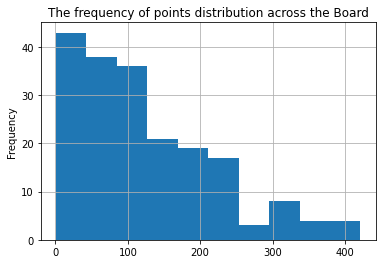

In [16]:
#plot a histogram to visualize the point distribution
series1 = points['total_points'].mean().sort_values(ascending = False)
series1.plot(kind = 'hist')
plt.title('The frequency of points distribution across the Board')
plt.grid()
plt.show()

##Bivariate analysis

In [17]:
# we want to analyze the relationship between home scores and countries/home teams
#using the groupby() function, we will group the home scores acccording to home teams
country = fifa.groupby(['home_team'])
#sort the values in descending order
sort = country['home_score'].sum().sort_values( ascending = False).head(20)
sort

home_team
Mexico                  145288
Brazil                  136422
Germany                 132418
Saudi Arabia            131846
Japan                   128700
Egypt                   126412
Australia               117546
Spain                   114114
Thailand                108680
France                  105820
Trinidad and Tobago     104962
Portugal                104390
Netherlands             104390
China PR                102674
Qatar                   101244
United Arab Emirates     98098
Oman                     97526
Argentina                93808
Kuwait                   91234
Tunisia                  89232
Name: home_score, dtype: int64

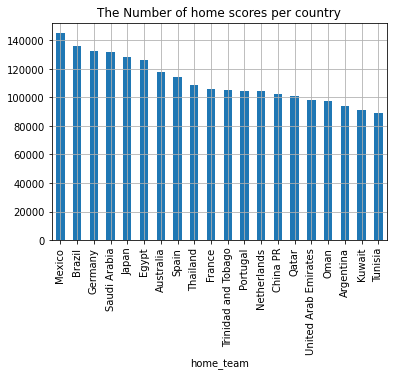

In [18]:
#plot a bar chart to visualize the relationship
sort.plot(kind = 'bar')
plt.title('The Number of home scores per country')
plt.grid()
plt.show()

# we can see that Mexico has the highest recorded scores while Tunisia has the lowest recorded scores.

##Multivariate analysis

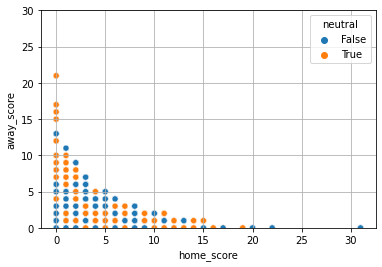

In [19]:
#now, let us check out the relationship between home scores and away scores, with regards to neutrality of the matches
#use a scatterplot to visualize this relationship
ax = sns.scatterplot(data = fifa_sample,x = 'home_score', y ='away_score', hue = 'neutral' )
ax.set(ylim = (0,30))
ax.grid()

#Logistic regression

Encoding

In [20]:
!pip install category_encoders

In [21]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
encoder = ce.OneHotEncoder(cols = 0, use_cat_names = True)

Splitting our values into train and test models

In [23]:
#import the train test split libraries
from sklearn.model_selection import train_test_split
train, test = train_test_split(fifa_sample, random_state = 0)

In [24]:
fifa_encoded = encoder.fit_transform(train)
fifa_encoded.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status,0_W,0_L,0_D
5664104,23,Paraguay,PAR,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1997-07-16,1998-02-08,Paraguay,Poland,4,0,Friendly,Asunción,Paraguay,False,4,1,0,0
9072038,97,Haiti,HAI,0.0,337,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2008-03-12,2015-07-18,Haiti,Jamaica,0,1,Gold Cup,Baltimore,United States,True,-1,0,1,0
6320643,97,Syria,SYR,0.0,30,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1997-09-17,2010-01-02,Syria,Zimbabwe,6,0,Friendly,Kuala Lumpur,Malaysia,True,6,1,0,0
8335834,9,Croatia,CRO,0.0,1075,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2011-01-12,2012-06-18,Croatia,Spain,0,1,UEFA Euro,Gdańsk,Poland,True,-1,0,1,0
3898486,48,Hungary,HUN,0.0,570,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2003-07-30,1997-06-08,Hungary,Norway,1,1,FIFA World Cup qualification,Budapest,Hungary,False,0,0,0,1


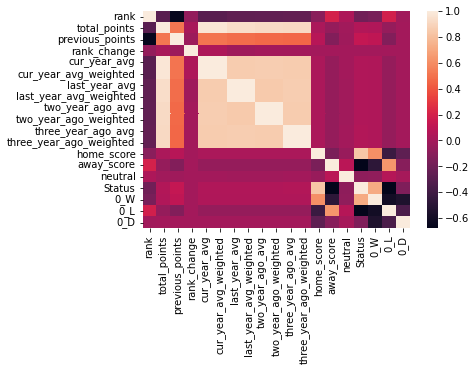

In [27]:
#use a heatmap to check multicollinearity of fields 
sns.heatmap(fifa_encoded.corr())

In [28]:
# Assign the variables for logistic regression
X = fifa_encoded[['home_score', 'away_score', 'rank','total_points']]
y = fifa_encoded[['0_D']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1000)
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = LogReg.predict(X_test)

In [30]:
#using a confusion matrix, we will build our model
#import the confusion matrix libraries
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[93352,     0],
       [19167, 10655]])

In [31]:
#to finally test our model, let us check the metrics
#import the metrics libraries
from sklearn import metrics

# MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#the RMSE is 0.39; our model is quite decent.

Mean Absolute Error: 0.15560913829217204
Mean Squared Error: 0.15560913829217204
Root Mean Squared Error: 0.3944732415413903


#Polynomial regression

In [32]:
#import libraries for polynomial regression
#
from sklearn.preprocessing import PolynomialFeatures

Encoding

In [33]:
X = fifa_encoded[['home_score', 'away_score', 'rank','total_points']]
y = fifa_encoded[['0_D']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1000)

Assigning variables for polynomial regression and degrees for linear regression

In [34]:
polyreg = PolynomialFeatures(degree = 2) 
X2 = polyreg.fit_transform(X)

# importing libraries for linear regression
from sklearn.linear_model import LinearRegression
polreg = LinearRegression()
polreg.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# we will move on to calculate the metrics
# import all necessary libraries
from sklearn import metrics
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 

# RMSE - Root mean squared error
rmse = np.sqrt(mean_squared_error(y,polreg.predict(X2)))
rmse

0.38513448942395623

Comparing the two models: 

The RMSE of the **logistic** model is 0.3944732415413903 ; the RMSE of the **polynomial** model is 0.38513448942395623. 

The polynomial model is more efficient since the RMSE is less.